## Урок 1. Алгоритм линейной регрессии. Градиентный спуск

In [1]:
import numpy as np
import matplotlib.pyplot as plt

__Задача:__ предсказание баллов ЕГЭ ученика в зависимости от количества лет стажа его репетитора

In [2]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 5, 3, 0, 5, 10, 1, 2]])
X

array([[ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1],
       [ 1,  1,  2,  5,  3,  0,  5, 10,  1,  2]])

In [3]:
X.shape

(2, 10)

In [4]:
y = [45, 55, 50, 55, 60, 35, 75, 80, 50, 60]

Уравнение прямой: $y = a*x + b$

In [5]:
y_pred1 = 35 * np.ones(10) + X[1]*5
y_pred2 = 40 * np.ones(10) + X[1]*7.5

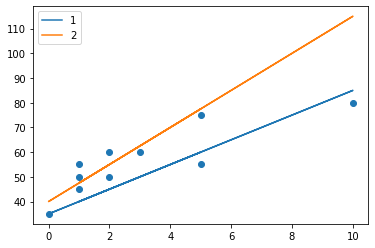

In [6]:
plt.scatter(X[1], y)
plt.plot(X[1], y_pred1, label='1')
plt.plot(X[1], y_pred2, label='2')
plt.legend()
plt.show()

Простая ошибка:

In [7]:
err1 = np.sum(y - y_pred1)
err2 = np.sum(y - y_pred2)
err1, err2

(65.0, -60.0)

MAE (Mean Absolute Error):

In [8]:
mae_1 = np.sum(np.abs(y - y_pred1)) / 10
mae_2 = np.sum(np.abs(y - y_pred2)) / 10
mae_1, mae_2

(8.5, 9.0)

MSE (Mean Squared Error):

In [9]:
mse_1 = np.mean((y - y_pred1)**2)
mse_2 = np.mean((y - y_pred2)**2)
mse_1, mse_2

(97.5, 188.75)

Метод наименьших квадратов (МНК):

In [10]:
X.shape

(2, 10)

In [11]:
X.T.shape

(10, 2)

In [12]:
all(X @ y == np.dot(X,y))

True

In [13]:
W = np.linalg.inv(np.dot(X, X.T)) @ X @ y
W

array([45.0625,  3.8125])

In [14]:
y_pred3 = W[0] * X[0] + W[1] * X[1]

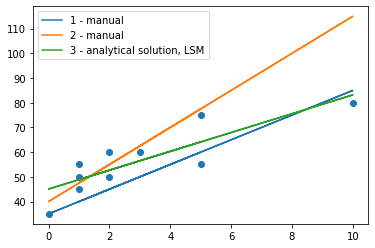

In [15]:
plt.scatter(X[1], y)
plt.plot(X[1], y_pred1, label='1 - manual')
plt.plot(X[1], y_pred2, label='2 - manual')
plt.plot(X[1], y_pred3, label='3 - analytical solution, LSM')
plt.legend()
plt.show()

In [16]:
def calc_mae(y, y_pred):
    err = np.mean(np.abs(y - y_pred))
    return err

def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2) # <=> 1/n * np.sum((y_pred - y)**2)
    return err

In [17]:
calc_mae(y, y_pred1), calc_mse(y, y_pred1)

(8.5, 97.5)

In [18]:
calc_mae(y, y_pred2), calc_mse(y, y_pred2)

(9.0, 188.75)

In [19]:
calc_mae(y, y_pred3), calc_mse(y, y_pred3)

(5.7875, 43.96875)

Градиентный спуск

In [20]:
n = 10
Q = 1/n * np.sum((y_pred3 - y)**2) # функционал ошибки, y = X*w

In [21]:
alpha = 1e-2 # величина шага
g = alpha * (1/n * 2 * np.sum(X[0] * (W[0] * X[0] - y)))

In [22]:
W[0], W[0] - g

(45.0625, 45.29125)

### Практическое задание

1. Подберите скорость обучения (alpha) и количество итераций.

In [23]:
n = X.shape[1]
alpha = 1e-1
W = np.array([1, 0.5])
print(f'Number of objects = {n} \
       \nLearning rate = {alpha} \
       \nInitial weights = {W} \n')

for i in range(120):
    y_pred = np.dot(W, X)
    err = calc_mse(y, y_pred)
    for k in range(W.shape[0]):
        W[k] -= alpha * (1/n * 2 * np.sum(X[k] * (y_pred - y)))
    # уменьшаем alpha с каждой 10 итерацией.
    if i % 10 == 0:
        alpha /= 1.1
        print(f'Iteration #{i}: W_new = {W}, MSE = {round(err,2)}')

Number of objects = 10        
Learning rate = 0.1        
Initial weights = [1.  0.5] 

Iteration #0: W_new = [11.8 38.2], MSE = 3047.75
Iteration #10: W_new = [12651.73553914 69617.0969639 ], MSE = 18310954068.05
Iteration #20: W_new = [ 7732434.81888021 42641607.37852184], MSE = 9128819654907560.0
Iteration #30: W_new = [1.06344502e+09 5.86454589e+09], MSE = 2.3279203642668532e+20
Iteration #40: W_new = [3.00127077e+10 1.65510116e+11], MSE = 2.5451335298159553e+23
Iteration #50: W_new = [1.55345341e+11 8.56677968e+11], MSE = 9.572295620500168e+24
Iteration #60: W_new = [1.27742291e+11 7.04456313e+11], MSE = 9.351480126476044e+24
Iteration #70: W_new = [1.38141953e+10 7.61806995e+10], MSE = 1.6408589528284036e+23
Iteration #80: W_new = [1.51674189e+08 8.36432543e+08], MSE = 3.125533537874497e+19
Iteration #90: W_new = [116395.49983176 641638.79865191], MSE = 31317286806394.77
Iteration #100: W_new = [48.41962984 22.99884537], MSE = 53518.86
Iteration #110: W_new = [44.97713543  3.827

__Ответ:__ В данном программном алгоритме применяется методика использования переменного размера шага: с каждой 10 итерацией размер шага уменьшается в 1.1 раз. Размер среднеквадратичной ошибки рассматривается с точностью до 2 знаков после запятой. 

С помощью градиентного спуска удалось добиться минимального значения MSE = 43.97, например, при параметрах:

* Шаг: 1e-1
* Количество итераций: 120

*2. В этом коде мы избавляемся от итераций по весам, но здесь есть ошибка, исправьте её.


Код с ошибкой:

In [24]:
n = X.shape[1]
alpha = 1e-2
W = np.array([1, 0.5])
print(f'Number of objects = {n} \
       \nLearning rate = {alpha} \
       \nInitial weights = {W} \n')

for i in range(100):
    y_pred = np.dot(W, X)
    err = calc_mse(y, y_pred)
#     for k in range(W.shape[0]):
#         W[k] -= alpha * (1/n * 2 * np.sum(X[k] * (y_pred - y)))
    W -= alpha * (1/n * 2 * np.sum(X * (y_pred - y)))
    W_pred = W
    if i % 10 == 0:
        print(f'Iteration #{i}: W_new = {W}, MSE = {round(err,2)}')

Number of objects = 10        
Learning rate = 0.01        
Initial weights = [1.  0.5] 

Iteration #0: W_new = [5.85 5.35], MSE = 3047.75
Iteration #10: W_new = [11.0965715 10.5965715], MSE = 597.49
Iteration #20: W_new = [11.10415569 10.60415569], MSE = 597.49
Iteration #30: W_new = [11.10416665 10.60416665], MSE = 597.49
Iteration #40: W_new = [11.10416667 10.60416667], MSE = 597.49
Iteration #50: W_new = [11.10416667 10.60416667], MSE = 597.49
Iteration #60: W_new = [11.10416667 10.60416667], MSE = 597.49
Iteration #70: W_new = [11.10416667 10.60416667], MSE = 597.49
Iteration #80: W_new = [11.10416667 10.60416667], MSE = 597.49
Iteration #90: W_new = [11.10416667 10.60416667], MSE = 597.49


Исправленый код:

In [25]:
n = X.shape[1]
alpha = 1e-2
W = np.array([1, 0.5])
print(f'Number of objects = {n} \
       \nLearning rate = {alpha} \
       \nInitial weights = {W} \n')

for i in range(800):
    y_pred = np.dot(W, X)  
    W -= alpha * (1/n * 2 * np.dot(X, (y_pred - y)))
    if i % 50 == 0:
        err = calc_mse(y, y_pred) 
        print(f'Iteration #{i}: W_new = {W}, MSE = {round(err,2)}')

Number of objects = 10        
Learning rate = 0.01        
Initial weights = [1.  0.5] 

Iteration #0: W_new = [2.08 4.27], MSE = 3047.75
Iteration #50: W_new = [18.69110735  8.59454545], MSE = 377.58
Iteration #100: W_new = [28.38281518  6.83710367], MSE = 177.43
Iteration #150: W_new = [34.51273915  5.72553647], MSE = 97.36
Iteration #200: W_new = [38.38986469  5.02247953], MSE = 65.33
Iteration #250: W_new = [40.84211409  4.57780191], MSE = 52.51
Iteration #300: W_new = [42.39314129  4.29654705], MSE = 47.39
Iteration #350: W_new = [43.37415299  4.1186557 ], MSE = 45.34
Iteration #400: W_new = [43.99463466  4.00614091], MSE = 44.52
Iteration #450: W_new = [44.38708413  3.93497626], MSE = 44.19
Iteration #500: W_new = [44.63530512  3.8899652 ], MSE = 44.06
Iteration #550: W_new = [44.79230282  3.86149609], MSE = 44.0
Iteration #600: W_new = [44.89160255  3.84348962], MSE = 43.98
Iteration #650: W_new = [44.95440879  3.83210067], MSE = 43.97
Iteration #700: W_new = [44.99413322  3.82

*3. Вместо того чтобы задавать количество итераций, задайте условие остановки алгоритма, когда ошибка за итерацию начинает изменяться ниже определённого порога — упрощённый аналог параметра tol в линейной регрессии в sklearn.

In [26]:
# количество объектов
n = X.shape[1]

# шаг
alpha = 1e-2

# критерий сходимости (условие остановки алгоритма)
min_weight_dist = 1e-4

# начальная разница весов
weight_dist = np.inf

# установка начальной точки
W = np.array([1, 0.5])

# чтобы не было бесконечного цикла, в случае отсутсвтия сходимости:
iter_num = 0
max_iter = 1e6

print(f'Number of objects = {n} \
       \nLearning rate = {alpha} \
       \nInitial weights = {W} \n')

while (weight_dist > min_weight_dist) and (iter_num < max_iter):
    y_pred = np.dot(W, X) 
    delta_w = alpha * (1/n * 2 * np.dot(X, (y_pred - y)))
    W -= delta_w
    weight_dist = np.linalg.norm(delta_w, ord=2)
    iter_num += 1
    if iter_num % 50 == 0:
        err = calc_mse(y, y_pred) 
        print(f'Iteration #{iter_num}: W_new = {W}, MSE = {round(err,4)}')    

Number of objects = 10        
Learning rate = 0.01        
Initial weights = [1.  0.5] 

Iteration #50: W_new = [18.44838865  8.63855875], MSE = 383.7456
Iteration #100: W_new = [28.22929764  6.86494171], MSE = 179.895
Iteration #150: W_new = [34.41564059  5.7431438 ], MSE = 98.3455
Iteration #200: W_new = [38.32845066  5.03361602], MSE = 65.7219
Iteration #250: W_new = [40.80327023  4.58484565], MSE = 52.671
Iteration #300: W_new = [42.36857287  4.30100215], MSE = 47.4501
Iteration #350: W_new = [43.35861367  4.12147351], MSE = 45.3614
Iteration #400: W_new = [43.98480618  4.00792316], MSE = 44.5259
Iteration #450: W_new = [44.38086769  3.93610351], MSE = 44.1916
Iteration #500: W_new = [44.63137328  3.89067818], MSE = 44.0579
Iteration #550: W_new = [44.78981596  3.86194705], MSE = 44.0044
Iteration #600: W_new = [44.89002963  3.84377484], MSE = 43.983
Iteration #650: W_new = [44.95341394  3.83228108], MSE = 43.9745
Iteration #700: W_new = [44.99350398  3.82501136], MSE = 43.971
Ite

4. Сделайте выводы по результатам работы с GD: что повышает качество результата, что понижает.

* Чем ближе критерий сходимости $\varepsilon$ к 0, тем выше качество результата и наоборот.
* Чем меньше шаг обучения, тем больше нужно итераций, поскольку движение от начальной точки к точке минимума происходит медленно. Соответственно в данном случае чем меньше итераций, тем ниже качество результата и наоборот.
* Чем меньше шаг обучения, тем менее вероятно попасть в ситуацию, когда производная по функции ошибки равна бесконечности (крутая поверхность ошибки). Из-за высокого шага обучения, например, наш алгоритм может постоянно попадать в точки, в которых производная имеет очень большое значение. Поэтому чем меньше шаг обучения, тем выше качество и наоборот. 
* Выбор начальной точки очень важен, однако как я понимаю носит некий случайный характер. Это связано с тем, что в зависимости от поверхности ошибки, наш "спуск" может пойти в совершенно разные стороны и поэтому результат может быть разным. Поэтому при оптимизации весов для лучшего качества результата, нужно прогнать алгоритм с использованием нескольких вариантов начальных точек.

---